# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [3]:
data.tail(n=10)

v1                                                 v2 Unnamed: 2  \
5562   ham  Ok lor... Sony ericsson salesman... I ask shuh...        NaN   
5563   ham                                Ard 6 like dat lor.        NaN   
5564   ham  Why don't you wait 'til at least wednesday to ...        NaN   
5565   ham                                       Huh y lei...        NaN   
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...        NaN   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
5562        NaN        NaN  
5563        NaN        NaN  
5564        NaN        NaN  
5565        NaN        NaN  
5566        NaN        NaN  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN

In [4]:
data.shape

(5572, 5)

# Data Cleaning

In [5]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [6]:
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [7]:
columns_to_drop = ['Unnamed: 2',"Unnamed: 3","Unnamed: 4"]
data.drop(columns_to_drop,inplace=True, axis=1)

In [8]:
data

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [9]:
def clean_text(text):
    """
    To clean a textual data
    params: text : str
    return final_text : str
    """
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [10]:
data['v2'] = data['v2'].apply(clean_text)

In [11]:
data.shape

(5572, 2)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size = 0.2, random_state = 2)

In [14]:
y_train.shape

(4457,)

In [15]:
X_test.shape

(1115,)

In [16]:
x_test_list = X_test.tolist()
y_test_list = y_test.tolist()

In [17]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

# converting text to numerical representation


In [18]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['v2'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

## Visulaizing TFIDF 

In [19]:
terms = Tfidf_vect.get_feature_names()

In [20]:
# create a dataframe from a word matrix
def dtm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

def idf2df(wm, feat_names):
  
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm, index=[0],
                      columns=feat_names)
    return(df)

In [21]:
df_tf_idf = dtm2df(X_test ,terms)

In [22]:
df_tf_idf

aa  aah  aathilov  aathiwher  abi  abil  abiola  abj  abl  abt  ...  \
Doc0     0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc1     0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc2     0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc3     0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc4     0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
...      ...  ...       ...        ...  ...   ...     ...  ...  ...  ...  ...   
Doc1110  0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc1111  0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc1112  0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc1113  0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   
Doc1114  0.0  0.0       0.0        0.0  0.0   0.0     0.0  0.0  0.0  0.0  ...   

         zoom  zouk  zyada   åð  åòharri  åòit  åômorrow  åôrent  ìll   ìï  
Doc0      0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc1      0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc2      0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc3      0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc4      0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
...       ...   ...    ...  ...      ...   ...       ...     ...  ...  ...  
Doc1110   0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc1111   0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc1112   0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc1113   0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  
Doc1114   0.0   0.0    0.0  0.0      0.0   0.0       0.0     0.0  0.0  0.0  

[1115 rows x 5000 columns]

In [23]:
transformed_documents_as_array = X_train.toarray()

In [24]:
# loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(Tfidf_vect.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)


In [25]:
one_doc_as_df

term     score
0     thesi  0.643086
1      ruin  0.604561
2      that  0.384105
3        go  0.270943
4        aa  0.000000
...     ...       ...
4995  given  0.000000
4996   give  0.000000
4997    giv  0.000000
4998   gist  0.000000
4999     ìï  0.000000

[5000 rows x 2 columns]

In [26]:
import time
start_time = time.time()
naive_bayes_classifier = MultinomialNB(alpha=0.2)
naive_bayes_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
y_pred = naive_bayes_classifier.predict(X_test)

In [27]:
training_time

0.007810354232788086

## Prepare a dataframe containing X test and Y test and another column containing respective predictions from Naive Bayes model

In [28]:
naive_bayes_prediction = y_pred.tolist()

In [29]:
result= {"text":x_test_list,"label":y_test_list,"naive_bayes_prediction":naive_bayes_prediction}

In [30]:
result_dataframe = pd.DataFrame.from_dict(result)
result_dataframe.to_csv('results/result_testing_data_imbalanced_data.csv')

## Evaluation of the Naive Bayes model

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9713004484304932


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       957
           1       0.94      0.85      0.89       158

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



## Visualizing evaluation metrics

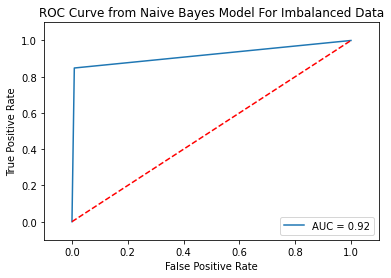

In [33]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve from Naive Bayes Model For Imbalanced Data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/naive_bayes_roc_imbalanced_data.jpg')
plt.show()

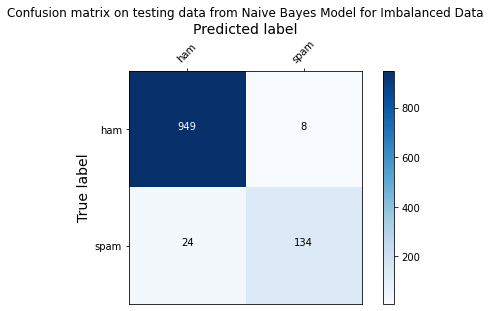

In [34]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.title("Confusion matrix on testing data from Naive Bayes Model for Imbalanced Data")
plt.savefig('results/naive_bayes_confusion_matrix_imbalanced_data.jpg')
plt.show()


# Saving model

In [35]:
import pickle
pickle.dump(naive_bayes_classifier, open("models/Naive_Bayes_spam_classification_model_imbalanced_data", 'wb'))
 

# Implement k fold cross validation



In [36]:
from sklearn.model_selection import KFold
import numpy as np


In [37]:
Encoder = LabelEncoder()
y = Encoder.fit_transform(data['v1'])
X= data['v2']
X = np.array(X)
kf = KFold(n_splits=10, random_state=4, shuffle=True)


In [38]:
accuracy_list = []
for train_index,test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    Tfidf_vect.fit(X_train)
    
    X_train = Tfidf_vect.transform(X_train)
    X_test = Tfidf_vect.transform(X_test)
    

    naive_bayes_classifier = MultinomialNB(alpha=0.2)
    naive_bayes_classifier.fit(X_train, y_train)
    y_pred = naive_bayes_classifier.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print("Accuracy in this fold is",accuracy)
    print('\n')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       478
           1       0.98      0.76      0.86        80

    accuracy                           0.96       558
   macro avg       0.97      0.88      0.92       558
weighted avg       0.96      0.96      0.96       558

Accuracy in this fold is 0.96415770609319


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       463
           1       1.00      0.88      0.94        95

    accuracy                           0.98       558
   macro avg       0.99      0.94      0.96       558
weighted avg       0.98      0.98      0.98       558

Accuracy in this fold is 0.9802867383512545


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       494
           1       0.98      0.89      0.93        63

    accuracy                           0.99       557
   macro avg       0.98      0.94     

In [39]:
accuracy_list = [i*100 for i in accuracy_list]

In [40]:
fold_list = [1,2,3,4,5,6,7,8,9,10]

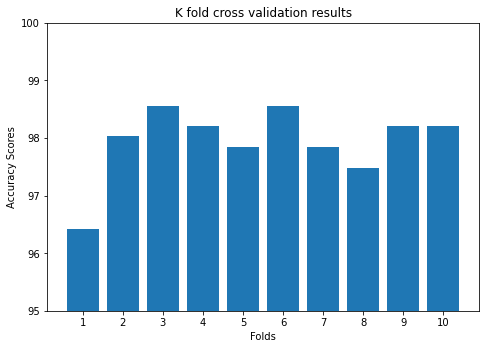

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([95,100])
# axes.set_xlim([0,4])
axes.xaxis.set_ticks(np.arange(0, 11, 1))
models = fold_list
accuracy_scores = accuracy_list
axes.bar(models,accuracy_scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy Scores')
plt.title('K fold cross validation results')
fig.savefig('results/k_fold_cross_validation_result_naive_bayes_imbalnced_data.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()


In [42]:
 loaded_model = pickle.load(open("models/Naive_Bayes_spam_classification_model_imbalanced_data", 'rb'))

# Use loaded model for predictiing to new data

In [43]:
# Predict for unseen data
test_data = "Free entry in El Classico tickets Oct 29 2020. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
cleaned_test_data = clean_text(test_data)
test_data_embedding = Tfidf_vect.transform([cleaned_test_data])

In [44]:
test_data_prediction = loaded_model.predict(test_data_embedding)[0].item()

In [45]:
def get_result(prediction_label):
    if prediction_label == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [46]:
get_result(test_data_prediction)

Message is NOT Spam
